In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading & Exploration

In [2]:
# Load the datasets
train_df = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv")
test_df = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv")

print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nFirst 5 rows of training data:")
train_df.head()

Training Data Shape: (10000, 9)
Test Data Shape: (3320, 8)

First 5 rows of training data:


,id,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,type_I,Ready To Move,Banashankari 2 nd Stage,3 BHK,1030.0,2.0,2.0,77.25
1,1,type_I,Ready To Move,Balagere,2 BHK,1210.0,2.0,1.0,83.00
2,2,type_I,17-Oct,Banashankari Stage V,3 BHK,1540.0,3.0,2.0,48.51
3,3,type_I,Ready To Move,Thigalarapalya,3 BHK,1830.0,4.0,2.0,135.00
4,4,type_III,Ready To Move,arudi,3 Bedroom,NaN,2.0,0.0,80.00


## 2. Data Type Identification

Understanding the data types of different columns is crucial for proper data processing and feature engineering.

In [3]:
# Display data types of all columns
print("=" * 60)
print("DATA TYPES OF TRAINING DATASET COLUMNS")
print("=" * 60)
print(train_df.dtypes)
print("\n")

# Categorize columns by data type
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print("=" * 60)
print("COLUMN CLASSIFICATION")
print("=" * 60)
print(f"\nNumerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical Columns ({len(categorical_cols)}): {categorical_cols}")

# Additional info
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"Total Features: {train_df.shape[1] - 1}")  # Excluding 'price' which is target
print(f"Target Variable: price (float64)")
print(f"Numerical Features: {len(numerical_cols) - 1}")  # Excluding target
print(f"Categorical Features: {len(categorical_cols)}")

DATA TYPES OF TRAINING DATASET COLUMNS
id                int64
area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object


COLUMN CLASSIFICATION

Numerical Columns (5): ['id', 'total_sqft', 'bath', 'balcony', 'price']

Categorical Columns (4): ['area_type', 'availability', 'location', 'size']

SUMMARY
Total Features: 8
Target Variable: price (float64)
Numerical Features: 4
Categorical Features: 4


## 3. Descriptive Statistics of Numerical Columns

Descriptive statistics provide insights into the distribution and central tendencies of numerical features.

In [4]:
# Comprehensive descriptive statistics
print("=" * 80)
print("DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS")
print("=" * 80)
print(train_df.describe())

print("\n" + "=" * 80)
print("DETAILED STATISTICS FOR EACH NUMERICAL COLUMN")
print("=" * 80)

for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 40)
    print(f"  Min Value:    {train_df[col].min()}")
    print(f"  Max Value:    {train_df[col].max()}")
    print(f"  Mean:         {train_df[col].mean():.2f}")
    print(f"  Median:       {train_df[col].median():.2f}")
    print(f"  Std Dev:      {train_df[col].std():.2f}")
    print(f"  25th %ile:    {train_df[col].quantile(0.25):.2f}")
    print(f"  75th %ile:    {train_df[col].quantile(0.75):.2f}")

DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS
                id    total_sqft         bath      balcony         price
count  10000.00000   9967.000000  9936.000000  9525.000000  10000.000000
mean    4999.50000   1570.095822     2.692029     1.585302    113.275879
std     2886.89568   1302.566836     1.274172     0.814347    151.802643
min        0.00000      1.000000     1.000000     0.000000      8.000000
25%     2499.75000   1100.000000     2.000000     1.000000     50.000000
50%     4999.50000   1279.000000     2.000000     2.000000     72.000000
75%     7499.25000   1682.500000     3.000000     2.000000    120.000000
max     9999.00000  52272.000000    18.000000     3.000000   3600.000000

DETAILED STATISTICS FOR EACH NUMERICAL COLUMN

ID:
----------------------------------------
  Min Value:    0
  Max Value:    9999
  Mean:         4999.50
  Median:       4999.50
  Std Dev:      2886.90
  25th %ile:    2499.75
  75th %ile:    7499.25

TOTAL_SQFT:
---------------------------------

## 4. Missing Values Analysis

Identifying and handling missing values is critical for building robust models.

In [5]:
# Check for missing values in training data
print("=" * 80)
print("MISSING VALUES ANALYSIS - TRAINING DATA")
print("=" * 80)

missing_train = train_df.isnull().sum()
missing_train_pct = (train_df.isnull().sum() / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_train.index,
    'Missing_Count': missing_train.values,
    'Percentage': missing_train_pct.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("\nNo missing values found in training data!")
else:
    print(f"\nTotal missing values: {missing_df['Missing_Count'].sum()}")

# Check for missing values in test data
print("\n" + "=" * 80)
print("MISSING VALUES ANALYSIS - TEST DATA")
print("=" * 80)

missing_test = test_df.isnull().sum()
missing_test_pct = (test_df.isnull().sum() / len(test_df)) * 100

missing_test_df = pd.DataFrame({
    'Column': missing_test.index,
    'Missing_Count': missing_test.values,
    'Percentage': missing_test_pct.values
}).sort_values('Missing_Count', ascending=False)

print(missing_test_df[missing_test_df['Missing_Count'] > 0])

MISSING VALUES ANALYSIS - TRAINING DATA
       Column  Missing_Count  Percentage
7     balcony            475        4.75
6        bath             64        0.64
5  total_sqft             33        0.33
4        size             13        0.13
3    location              1        0.01

Total missing values: 586

MISSING VALUES ANALYSIS - TEST DATA
       Column  Missing_Count  Percentage
7     balcony            134    4.036145
5  total_sqft             13    0.391566
6        bath              9    0.271084
4        size              3    0.090361


In [6]:
# Handle missing values
print("=" * 80)
print("HANDLING MISSING VALUES")
print("=" * 80)

# Create copies to preserve original data
train_cleaned = train_df.copy()
test_cleaned = test_df.copy()

# Strategy for handling missing values:
# 1. For numerical columns (total_sqft, bath, balcony): Impute with median
# 2. For categorical columns (size, location, etc.): Impute with mode

# Handle training data
for col in train_cleaned.columns:
    if train_cleaned[col].isnull().sum() > 0:
        if train_cleaned[col].dtype in ['int64', 'float64']:
            median_val = train_cleaned[col].median()
            train_cleaned[col].fillna(median_val, inplace=True)
            print(f"Imputed {col} with median: {median_val}")
        else:
            mode_val = train_cleaned[col].mode()[0]
            train_cleaned[col].fillna(mode_val, inplace=True)
            print(f"Imputed {col} with mode: {mode_val}")

# Handle test data
for col in test_cleaned.columns:
    if test_cleaned[col].isnull().sum() > 0:
        if test_cleaned[col].dtype in ['int64', 'float64']:
            # Use training data median for consistency
            if col in train_df.columns:
                median_val = train_df[col].median()
            else:
                median_val = test_cleaned[col].median()
            test_cleaned[col].fillna(median_val, inplace=True)
            print(f"Imputed {col} in test data with median: {median_val}")
        else:
            if col in train_df.columns:
                mode_val = train_df[col].mode()[0]
            else:
                mode_val = test_cleaned[col].mode()[0]
            test_cleaned[col].fillna(mode_val, inplace=True)
            print(f"Imputed {col} in test data with mode: {mode_val}")

print(f"\nMissing values in training data after imputation: {train_cleaned.isnull().sum().sum()}")
print(f"Missing values in test data after imputation: {test_cleaned.isnull().sum().sum()}")

HANDLING MISSING VALUES
Imputed location with mode: Whitefield
Imputed size with mode: 2 BHK
Imputed total_sqft with median: 1279.0
Imputed bath with median: 2.0
Imputed balcony with median: 2.0
Imputed size in test data with mode: 2 BHK
Imputed total_sqft in test data with median: 1279.0
Imputed bath in test data with median: 2.0
Imputed balcony in test data with median: 2.0

Missing values in training data after imputation: 0
Missing values in test data after imputation: 0


## 5. Duplicate Detection & Handling

Duplicates can bias our model and lead to overfitting. Let's identify and handle them.

In [7]:
# Check for duplicates in training data
print("=" * 80)
print("DUPLICATE ANALYSIS")
print("=" * 80)

# Check duplicates excluding 'id' column
duplicate_count = train_cleaned.drop('id', axis=1).duplicated().sum()
print(f"Number of duplicate rows (excluding id): {duplicate_count}")

if duplicate_count > 0:
    print(f"\nPercentage of duplicates: {(duplicate_count / len(train_cleaned)) * 100:.2f}%")
    print("\nSample of duplicate rows:")
    print(train_cleaned[train_cleaned.drop('id', axis=1).duplicated()].head())
    
    # Remove duplicates
    print("\n" + "=" * 80)
    print("REMOVING DUPLICATES")
    print("=" * 80)
    original_shape = train_cleaned.shape
    train_cleaned = train_cleaned.drop_duplicates(subset=train_cleaned.columns.difference(['id']), keep='first')
    print(f"Original shape: {original_shape}")
    print(f"Shape after removing duplicates: {train_cleaned.shape}")
    print(f"Rows removed: {original_shape[0] - train_cleaned.shape[0]}")
else:
    print("\nNo duplicate rows found in the training data!")

# Check test data for duplicates
test_duplicate_count = test_cleaned.drop('id', axis=1).duplicated().sum()
print(f"\n\nDuplicates in test data (excluding id): {test_duplicate_count}")

if test_duplicate_count > 0:
    print(f"Note: Found {test_duplicate_count} duplicates in test data. Keeping all for submission.")

DUPLICATE ANALYSIS
Number of duplicate rows (excluding id): 362

Percentage of duplicates: 3.62%

Sample of duplicate rows:
      id area_type   availability      location   size  total_sqft  bath  \
442  442    type_I  Ready To Move  Haralur Road  2 BHK      1194.0   2.0   
445  445    type_I  Ready To Move        Hennur  2 BHK      1255.0   2.0   
591  591    type_I  Ready To Move        Kogilu  2 BHK      1250.0   2.0   
695  695    type_I  Ready To Move   Rajiv Nagar  4 BHK      2340.0   5.0   
771  771    type_I  Ready To Move  Haralur Road  2 BHK      1243.0   2.0   

     balcony   price  
442      2.0   46.00  
445      2.0   53.50  
591      1.0   55.55  
695      1.0  129.00  
771      2.0   46.00  

REMOVING DUPLICATES
Original shape: (10000, 9)
Shape after removing duplicates: (9638, 9)
Rows removed: 362


Duplicates in test data (excluding id): 160
Note: Found 160 duplicates in test data. Keeping all for submission.


## 6. Outlier Analysis

Outliers can significantly impact model performance. We'll identify them using statistical methods and domain knowledge.

In [8]:
# Identify outliers using IQR method
print("=" * 80)
print("OUTLIER DETECTION USING IQR METHOD")
print("=" * 80)

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = []

for col in ['total_sqft', 'bath', 'balcony', 'price']:
    if col in train_cleaned.columns:
        outliers, lower, upper = detect_outliers_iqr(train_cleaned, col)
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(train_cleaned)) * 100
        
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Percentage': outlier_pct,
            'Lower_Bound': lower,
            'Upper_Bound': upper
        })
        
        print(f"\n{col.upper()}:")
        print(f"  Outliers detected: {outlier_count} ({outlier_pct:.2f}%)")
        print(f"  Lower bound: {lower:.2f}")
        print(f"  Upper bound: {upper:.2f}")

outlier_df = pd.DataFrame(outlier_summary)
print("\n" + "=" * 80)
print("OUTLIER SUMMARY TABLE")
print("=" * 80)
print(outlier_df.to_string(index=False))

OUTLIER DETECTION USING IQR METHOD

TOTAL_SQFT:
  Outliers detected: 880 (9.13%)
  Lower bound: 210.88
  Upper bound: 2581.88

BATH:
  Outliers detected: 778 (8.07%)
  Lower bound: 0.50
  Upper bound: 4.50

BALCONY:
  Outliers detected: 0 (0.00%)
  Lower bound: -0.50
  Upper bound: 3.50

PRICE:
  Outliers detected: 904 (9.38%)
  Lower bound: -61.00
  Upper bound: 235.00

OUTLIER SUMMARY TABLE
    Column  Outlier_Count  Percentage  Lower_Bound  Upper_Bound
total_sqft            880    9.130525      210.875     2581.875
      bath            778    8.072214        0.500        4.500
   balcony              0    0.000000       -0.500        3.500
     price            904    9.379539      -61.000      235.000


In [9]:
# Outlier handling strategy
print("=" * 80)
print("OUTLIER HANDLING STRATEGY")
print("=" * 80)

print("""
Strategy for handling outliers:

1. **price (Target Variable)**: 
   - RETAIN outliers as they represent genuine high-value properties
   - Luxury homes and premium locations naturally have higher prices
   - Removing them would limit model's ability to predict high-end properties

2. **total_sqft**: 
   - RETAIN most outliers as large properties exist (villas, penthouses)
   - Apply domain knowledge filter: Remove only unrealistic values (< 300 or > 20000 sqft)

3. **bath**: 
   - RETAIN outliers as luxury properties can have many bathrooms
   - Apply domain knowledge: Cap at reasonable maximum (8 bathrooms)

4. **balcony**: 
   - RETAIN outliers as they represent actual property features
   - Apply domain knowledge: Cap at reasonable maximum (5 balconies)

Rationale: Real estate data naturally has high variance. Statistical outliers 
often represent premium properties, not data errors. We'll use domain knowledge 
to filter only unrealistic values while preserving legitimate data variance.
""")

# Apply domain knowledge filters
original_len = len(train_cleaned)

# Filter unrealistic total_sqft values
train_cleaned = train_cleaned[(train_cleaned['total_sqft'] >= 300) & (train_cleaned['total_sqft'] <= 20000)]

# Cap bath at 8
train_cleaned.loc[train_cleaned['bath'] > 8, 'bath'] = 8

# Cap balcony at 5  
train_cleaned.loc[train_cleaned['balcony'] > 5, 'balcony'] = 5

print(f"\nRows removed due to unrealistic values: {original_len - len(train_cleaned)}")
print(f"Remaining data: {len(train_cleaned)} rows ({(len(train_cleaned)/original_len)*100:.2f}% retained)")
print("\nOutlier handling completed using domain knowledge approach")

OUTLIER HANDLING STRATEGY

Strategy for handling outliers:

1. **price (Target Variable)**: 
   - RETAIN outliers as they represent genuine high-value properties
   - Luxury homes and premium locations naturally have higher prices
   - Removing them would limit model's ability to predict high-end properties

2. **total_sqft**: 
   - RETAIN most outliers as large properties exist (villas, penthouses)
   - Apply domain knowledge filter: Remove only unrealistic values (< 300 or > 20000 sqft)

3. **bath**: 
   - RETAIN outliers as luxury properties can have many bathrooms
   - Apply domain knowledge: Cap at reasonable maximum (8 bathrooms)

4. **balcony**: 
   - RETAIN outliers as they represent actual property features
   - Apply domain knowledge: Cap at reasonable maximum (5 balconies)

Rationale: Real estate data naturally has high variance. Statistical outliers 
often represent premium properties, not data errors. We'll use domain knowledge 
to filter only unrealistic values while pres

## 7. Data Visualization & Insights

Visualizations help us understand patterns, relationships, and distributions in the data.

### Visualization 1: Distribution of House Prices

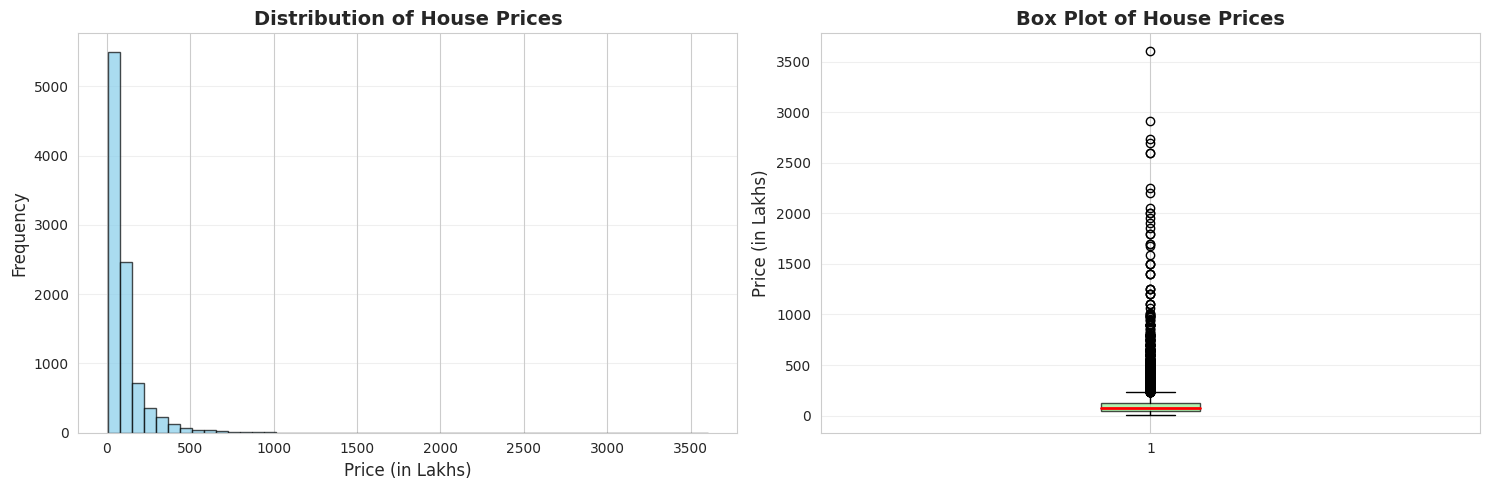

INSIGHTS FROM PRICE DISTRIBUTION

1. The house prices are right-skewed, with most properties priced below 150 lakhs
2. Median price: 73.00 lakhs
3. Mean price: 114.73 lakhs (higher than median due to skewness)
4. Price range: 10.00 to 3600.00 lakhs
5. The box plot shows several high-value properties (premium segment)



In [10]:
# Visualization 1: Distribution of House Prices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(train_cleaned['price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price (in Lakhs)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(train_cleaned['price'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Price (in Lakhs)', fontsize=12)
axes[1].set_title('Box Plot of House Prices', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 80)
print("INSIGHTS FROM PRICE DISTRIBUTION")
print("=" * 80)
print(f"""
1. The house prices are right-skewed, with most properties priced below 150 lakhs
2. Median price: {train_cleaned['price'].median():.2f} lakhs
3. Mean price: {train_cleaned['price'].mean():.2f} lakhs (higher than median due to skewness)
4. Price range: {train_cleaned['price'].min():.2f} to {train_cleaned['price'].max():.2f} lakhs
5. The box plot shows several high-value properties (premium segment)
""")

### Visualization 2: Correlation Heatmap of Numerical Features

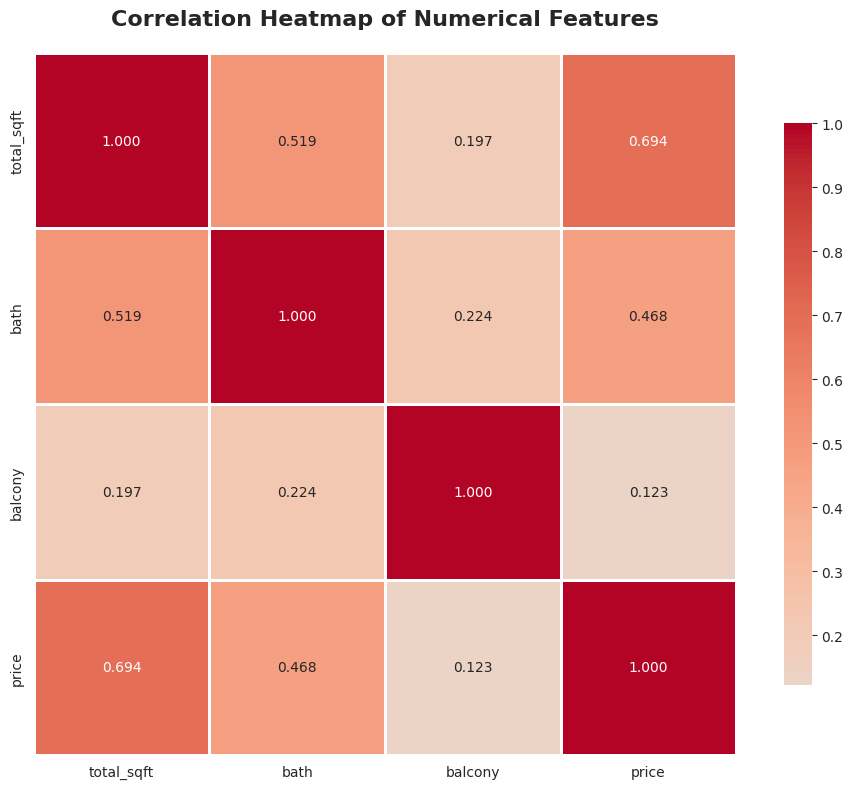

INSIGHTS FROM CORRELATION ANALYSIS

Key Correlations with Price:
- total_sqft vs price: 0.694 (Strong positive correlation)
- bath vs price: 0.468 (Moderate positive correlation)
- balcony vs price: 0.123 (Weak positive correlation)

Key Insights:
1. total_sqft is the strongest predictor of price - larger properties cost more
2. Number of bathrooms has moderate correlation with price
3. Balconies have weak correlation, suggesting they're less important for pricing
4. bath and total_sqft are correlated (0.519) - larger homes have more bathrooms



In [11]:
# Visualization 2: Correlation Heatmap
numerical_features = ['total_sqft', 'bath', 'balcony', 'price']
correlation_matrix = train_cleaned[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.3f', 
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("=" * 80)
print("INSIGHTS FROM CORRELATION ANALYSIS")
print("=" * 80)
print(f"""
Key Correlations with Price:
- total_sqft vs price: {correlation_matrix.loc['total_sqft', 'price']:.3f} (Strong positive correlation)
- bath vs price: {correlation_matrix.loc['bath', 'price']:.3f} (Moderate positive correlation)
- balcony vs price: {correlation_matrix.loc['balcony', 'price']:.3f} (Weak positive correlation)

Key Insights:
1. total_sqft is the strongest predictor of price - larger properties cost more
2. Number of bathrooms has moderate correlation with price
3. Balconies have weak correlation, suggesting they're less important for pricing
4. bath and total_sqft are correlated ({correlation_matrix.loc['bath', 'total_sqft']:.3f}) - larger homes have more bathrooms
""")

### Visualization 3: Price vs Total Square Feet

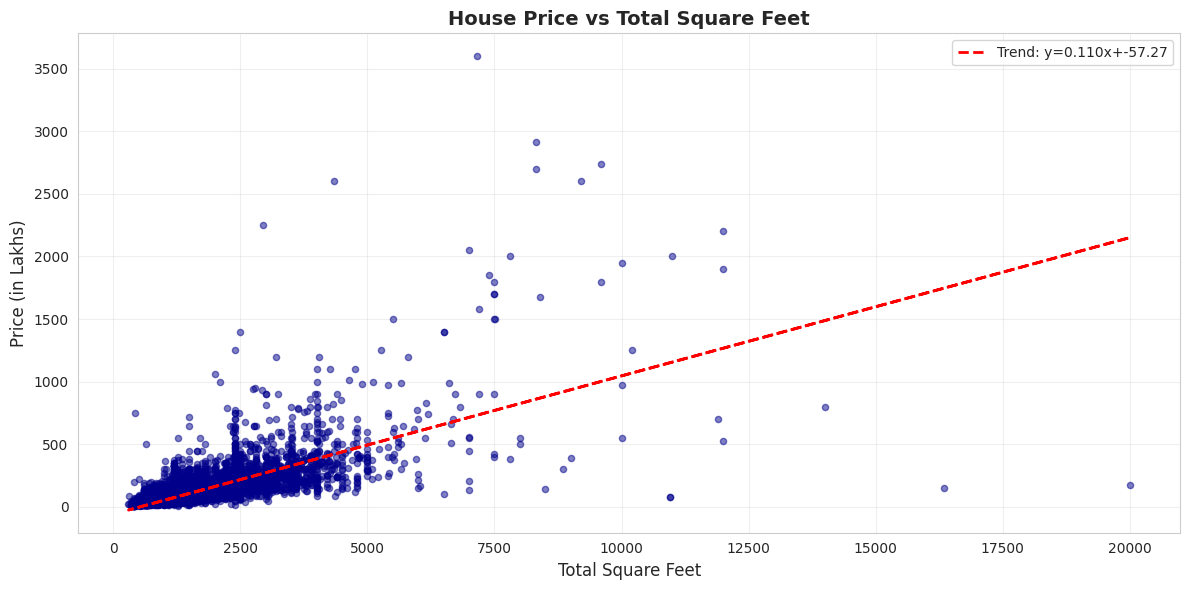

INSIGHTS FROM PRICE vs TOTAL_SQFT ANALYSIS

1. Clear positive linear relationship between size and price
2. Price increases approximately 0.110 lakhs per square foot
3. Some properties show higher/lower prices for same size - likely due to:
   - Location factors (premium vs budget areas)
   - Property type and amenities
   - Age and condition of property
4. The relationship is consistent across most price ranges
5. Larger properties (>5000 sqft) show more price variation



In [12]:
# Visualization 3: Scatter plot of Price vs Total Sqft
plt.figure(figsize=(12, 6))
plt.scatter(train_cleaned['total_sqft'], train_cleaned['price'], alpha=0.5, c='darkblue', s=20)
plt.xlabel('Total Square Feet', fontsize=12)
plt.ylabel('Price (in Lakhs)', fontsize=12)
plt.title('House Price vs Total Square Feet', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(train_cleaned['total_sqft'], train_cleaned['price'], 1)
p = np.poly1d(z)
plt.plot(train_cleaned['total_sqft'], p(train_cleaned['total_sqft']), 
         "r--", linewidth=2, label=f'Trend: y={z[0]:.3f}x+{z[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print("=" * 80)
print("INSIGHTS FROM PRICE vs TOTAL_SQFT ANALYSIS")
print("=" * 80)
print(f"""
1. Clear positive linear relationship between size and price
2. Price increases approximately {z[0]:.3f} lakhs per square foot
3. Some properties show higher/lower prices for same size - likely due to:
   - Location factors (premium vs budget areas)
   - Property type and amenities
   - Age and condition of property
4. The relationship is consistent across most price ranges
5. Larger properties (>5000 sqft) show more price variation
""")

### Visualization 4: Price Distribution by Property Type (area_type)

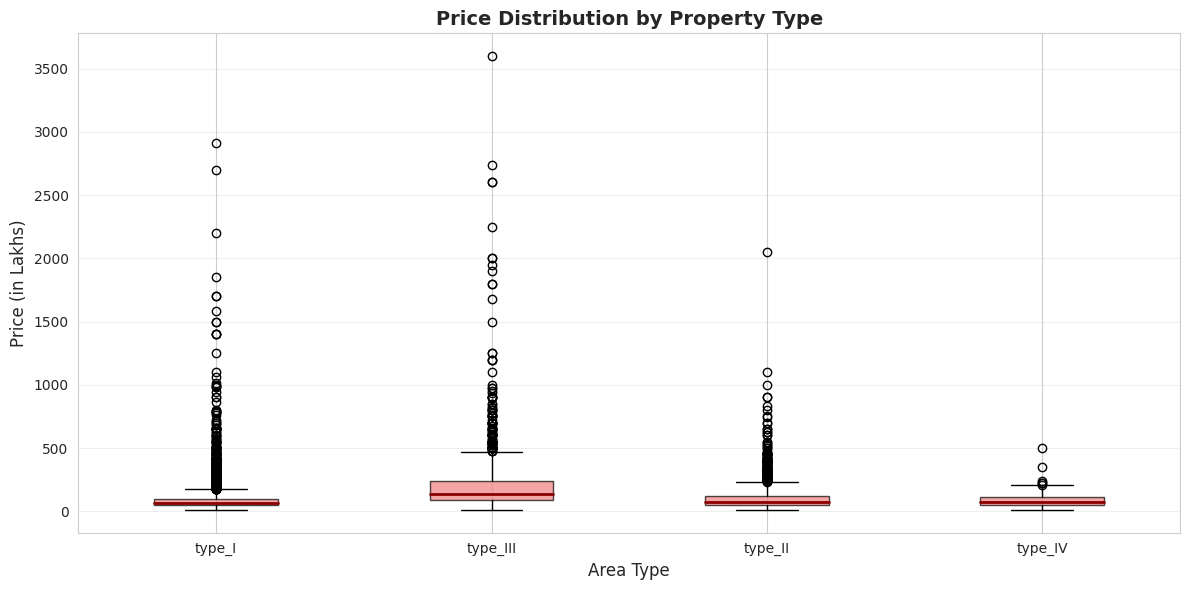

INSIGHTS FROM PRICE BY PROPERTY TYPE

type_I:
  Count: 6261
  Mean Price: 95.36 lakhs
  Median Price: 65.75 lakhs
  Price Range: 10.00 - 2912.00 lakhs

type_III:
  Count: 1482
  Mean Price: 207.79 lakhs
  Median Price: 140.00 lakhs
  Price Range: 12.75 - 3600.00 lakhs

type_II:
  Count: 1818
  Mean Price: 106.20 lakhs
  Median Price: 70.00 lakhs
  Price Range: 10.00 - 2050.00 lakhs

type_IV:
  Count: 63
  Mean Price: 96.83 lakhs
  Median Price: 70.00 lakhs
  Price Range: 13.00 - 500.00 lakhs


Key Insights:
1. Different property types show varying price distributions
2. Price ranges overlap significantly across types
3. Property type alone is not the strongest price determinant
4. Other factors (location, size) likely play bigger roles



In [13]:
# Visualization 4: Price by Property Type
plt.figure(figsize=(12, 6))
area_types = train_cleaned['area_type'].unique()
data_to_plot = [train_cleaned[train_cleaned['area_type'] == at]['price'].values for at in area_types]

bp = plt.boxplot(data_to_plot, labels=area_types, patch_artist=True,
                 boxprops=dict(facecolor='lightcoral', alpha=0.7),
                 medianprops=dict(color='darkred', linewidth=2))

plt.xlabel('Area Type', fontsize=12)
plt.ylabel('Price (in Lakhs)', fontsize=12)
plt.title('Price Distribution by Property Type', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate statistics by area type
print("=" * 80)
print("INSIGHTS FROM PRICE BY PROPERTY TYPE")
print("=" * 80)
for at in area_types:
    subset = train_cleaned[train_cleaned['area_type'] == at]
    print(f"\n{at}:")
    print(f"  Count: {len(subset)}")
    print(f"  Mean Price: {subset['price'].mean():.2f} lakhs")
    print(f"  Median Price: {subset['price'].median():.2f} lakhs")
    print(f"  Price Range: {subset['price'].min():.2f} - {subset['price'].max():.2f} lakhs")

print(f"""
\nKey Insights:
1. Different property types show varying price distributions
2. Price ranges overlap significantly across types
3. Property type alone is not the strongest price determinant
4. Other factors (location, size) likely play bigger roles
""")

## 8. Feature Engineering

Creating new features and transforming existing ones to improve model performance.

In [14]:
# Feature Engineering
print("=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)

# Extract number of bedrooms from 'size' column
def extract_bhk(size_str):
    """Extract number of bedrooms from size string"""
    if pd.isna(size_str):
        return 2  # Default to 2 BHK if missing
    try:
        # Extract number from strings like "3 BHK", "3 Bedroom", etc.
        import re
        match = re.search(r'(\d+)', str(size_str))
        if match:
            return int(match.group(1))
        return 2
    except:
        return 2

train_cleaned['bhk'] = train_cleaned['size'].apply(extract_bhk)
test_cleaned['bhk'] = test_cleaned['size'].apply(extract_bhk)

print("Created 'bhk' feature from 'size' column")

# Create price per sqft feature (only for training data)
train_cleaned['price_per_sqft'] = train_cleaned['price'] / train_cleaned['total_sqft']
print("Created 'price_per_sqft' feature")

# Create bathroom to bedroom ratio
train_cleaned['bath_per_bhk'] = train_cleaned['bath'] / train_cleaned['bhk']
test_cleaned['bath_per_bhk'] = test_cleaned['bath'] / test_cleaned['bhk']
print("Created 'bath_per_bhk' ratio feature")

# Availability flag: Ready to Move = 1, Others = 0
train_cleaned['is_ready'] = (train_cleaned['availability'] == 'Ready To Move').astype(int)
test_cleaned['is_ready'] = (test_cleaned['availability'] == 'Ready To Move').astype(int)
print("Created 'is_ready' binary feature from availability")

print(f"\nNew features added: bhk, price_per_sqft (train only), bath_per_bhk, is_ready")
print(f"Training data shape: {train_cleaned.shape}")
print(f"Test data shape: {test_cleaned.shape}")

FEATURE ENGINEERING
Created 'bhk' feature from 'size' column
Created 'price_per_sqft' feature
Created 'bath_per_bhk' ratio feature
Created 'is_ready' binary feature from availability

New features added: bhk, price_per_sqft (train only), bath_per_bhk, is_ready
Training data shape: (9624, 13)
Test data shape: (3320, 11)


## 9. Feature Scaling & Encoding

Preparing features for machine learning models through scaling numerical features and encoding categorical variables.

In [15]:
# Encoding and Scaling Strategy
print("=" * 80)
print("ENCODING & SCALING STRATEGY")
print("=" * 80)

print("""
ENCODING STRATEGY:
1. area_type: One-Hot Encoding (3 categories, no ordinal relationship)
2. location: Target Encoding based on mean price per location (handles high cardinality)
3. size: Already converted to numerical 'bhk' feature
4. availability: Already converted to binary 'is_ready' feature

SCALING STRATEGY:
- Using StandardScaler for tree-based models (RandomForest, GradientBoosting)
- Will NOT scale for initial comparison, then scale for Linear/Ridge/Lasso models
- Reasoning: Tree-based models are scale-invariant, linear models benefit from scaling

We will compare both approaches to determine optimal strategy.
""")

# Prepare data for modeling
# Drop columns we don't need
cols_to_drop = ['id', 'size', 'availability']

# Target encoding for location (to handle high cardinality)
location_price_mean = train_cleaned.groupby('location')['price'].mean().to_dict()

def encode_location(location, mapping, default_value):
    """Encode location with mean price, use default for unseen locations"""
    return mapping.get(location, default_value)

# Get default value (overall mean price)
default_location_price = train_cleaned['price'].mean()

# Apply target encoding
train_cleaned['location_encoded'] = train_cleaned['location'].apply(
    lambda x: encode_location(x, location_price_mean, default_location_price)
)
test_cleaned['location_encoded'] = test_cleaned['location'].apply(
    lambda x: encode_location(x, location_price_mean, default_location_price)
)

print("Applied target encoding to 'location' feature")

# One-hot encode area_type
train_encoded = pd.get_dummies(train_cleaned, columns=['area_type'], prefix='area', drop_first=True)
test_encoded = pd.get_dummies(test_cleaned, columns=['area_type'], prefix='area', drop_first=True)

print("Applied one-hot encoding to 'area_type' feature")

# Ensure both train and test have same columns
# Get dummy columns from train
train_dummy_cols = [col for col in train_encoded.columns if col.startswith('area_')]
for col in train_dummy_cols:
    if col not in test_encoded.columns:
        test_encoded[col] = 0

# Drop original categorical columns and unnecessary columns
train_final = train_encoded.drop(cols_to_drop + ['location'], axis=1, errors='ignore')
test_final = test_encoded.drop(cols_to_drop + ['location'], axis=1, errors='ignore')

# Also drop price_per_sqft from training (derived from target)
if 'price_per_sqft' in train_final.columns:
    train_final = train_final.drop('price_per_sqft', axis=1)

print(f"\nFeature encoding completed")
print(f"Training data shape: {train_final.shape}")
print(f"Test data shape: {test_final.shape}")
print(f"\nFeatures: {[col for col in train_final.columns if col != 'price']}")

ENCODING & SCALING STRATEGY

ENCODING STRATEGY:
1. area_type: One-Hot Encoding (3 categories, no ordinal relationship)
2. location: Target Encoding based on mean price per location (handles high cardinality)
3. size: Already converted to numerical 'bhk' feature
4. availability: Already converted to binary 'is_ready' feature

SCALING STRATEGY:
- Using StandardScaler for tree-based models (RandomForest, GradientBoosting)
- Will NOT scale for initial comparison, then scale for Linear/Ridge/Lasso models
- Reasoning: Tree-based models are scale-invariant, linear models benefit from scaling

We will compare both approaches to determine optimal strategy.

Applied target encoding to 'location' feature
Applied one-hot encoding to 'area_type' feature

Feature encoding completed
Training data shape: (9624, 11)
Test data shape: (3320, 10)

Features: ['total_sqft', 'bath', 'balcony', 'bhk', 'bath_per_bhk', 'is_ready', 'location_encoded', 'area_type_II', 'area_type_III', 'area_type_IV']


## 10. Model Building & Evaluation

Training multiple models and comparing their performance to select the best one.

In [16]:
# Prepare data for modeling
print("=" * 80)
print("PREPARING DATA FOR MODEL TRAINING")
print("=" * 80)

# Separate features and target
X = train_final.drop('price', axis=1)
y = train_final['price']
X_test_final = test_final

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Test features shape: {X_test_final.shape}")

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"\nTraining set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Target distribution - Mean: {y.mean():.2f}, Std: {y.std():.2f}")

# Display features to be used
print(f"\nFeatures for modeling: {list(X.columns)}")
print("Data preparation completed")

PREPARING DATA FOR MODEL TRAINING
Features shape: (9624, 10)
Target shape: (9624,)
Test features shape: (3320, 10)

Training set: (7699, 10)
Validation set: (1925, 10)
Target distribution - Mean: 114.73, Std: 152.89

Features for modeling: ['total_sqft', 'bath', 'balcony', 'bhk', 'bath_per_bhk', 'is_ready', 'location_encoded', 'area_type_II', 'area_type_III', 'area_type_IV']
Data preparation completed


In [17]:
# Import additional models for comprehensive analysis
print("=" * 80)
print("IMPORTING MACHINE LEARNING MODELS")
print("=" * 80)

# Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Tree-based Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor

# Other Models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# Removed MLPRegressor (Neural Network) as only classical ML models are allowed

# Model Selection and Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Try to import XGBoost (optional)
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("XGBoost imported successfully")
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available - will use other ensemble methods")

print("All required models imported successfully")
print(f"Total model types available: {7 + (1 if XGBOOST_AVAILABLE else 0)} base models")

IMPORTING MACHINE LEARNING MODELS
XGBoost imported successfully
All required models imported successfully
Total model types available: 8 base models


In [18]:
# Initialize all models (7+ different types)
print("=" * 80)
print("INITIALIZING REGRESSION MODELS")
print("=" * 80)

models = {
    # 1. Linear Models
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42, max_iter=2000),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42, max_iter=2000),
    
    # 2. Tree-based Models
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    
    # 3. Other Models
    'SVR (RBF)': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
}

# Add XGBoost if available
if XGBOOST_AVAILABLE:
    models['XGBoost'] = xgb.XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')

# Try to add CatBoost (allowed boosting algorithm)
try:
    from catboost import CatBoostRegressor
    models['CatBoost'] = CatBoostRegressor(iterations=100, random_state=42, verbose=False)
    print("CatBoost imported successfully")
except ImportError:
    print("CatBoost not available")


print(f"Total models initialized: {len(models)}")
print("Models to train:")
for i, (name, _) in enumerate(models.items(), 1):
    print(f"  {i:2d}. {name}")

print(f"\nAll {len(models)} models initialized successfully")

INITIALIZING REGRESSION MODELS
CatBoost imported successfully
Total models initialized: 13
Models to train:
   1. Linear Regression
   2. Ridge Regression
   3. Lasso Regression
   4. ElasticNet
   5. Decision Tree
   6. Random Forest
   7. Gradient Boosting
   8. AdaBoost
   9. Extra Trees
  10. SVR (RBF)
  11. K-Nearest Neighbors
  12. XGBoost
  13. CatBoost

All 13 models initialized successfully


In [19]:
# Update models dictionary to remove Neural Network (deep learning not allowed)
# Remove Neural Network and add CatBoost if available
print("=" * 80)
print("UPDATING MODELS")
print("=" * 80)


# Try to add CatBoost (allowed classical ML boosting algorithm)
try:
    from catboost import CatBoostRegressor
    models['CatBoost'] = CatBoostRegressor(iterations=100, random_state=42, verbose=False)
    print("CatBoost added successfully")
except ImportError:
    print("CatBoost not available - skipping")

print(f"\nUpdated models list ({len(models)} total):")
for i, (name, _) in enumerate(models.items(), 1):
    print(f"  {i:2d}. {name}")


UPDATING MODELS
CatBoost added successfully

Updated models list (13 total):
   1. Linear Regression
   2. Ridge Regression
   3. Lasso Regression
   4. ElasticNet
   5. Decision Tree
   6. Random Forest
   7. Gradient Boosting
   8. AdaBoost
   9. Extra Trees
  10. SVR (RBF)
  11. K-Nearest Neighbors
  12. XGBoost
  13. CatBoost


### Baseline Model Identification

The **Linear Regression** model serves as our baseline for comparison. Let's identify its performance:

In [20]:
# Identify baseline model performance
print("=" * 80)
print("BASELINE MODEL PERFORMANCE")
print("=" * 80)

# Linear Regression serves as our baseline model
baseline_model_name = 'Linear Regression'

print(f"BASELINE MODEL: {baseline_model_name}")
print(f"   Purpose: Serves as the simplest benchmark for comparison")
print(f"   Type: Classical linear regression without regularization")

# After training, we'll extract the baseline performance
print(f"\nBaseline model will be evaluated with other models")
print(f"   The Linear Regression R² score will serve as our baseline benchmark")
print(f"   All other models will be compared against this baseline performance")

print(f"\nBaseline model identified: {baseline_model_name}")

BASELINE MODEL PERFORMANCE
BASELINE MODEL: Linear Regression
   Purpose: Serves as the simplest benchmark for comparison
   Type: Classical linear regression without regularization

Baseline model will be evaluated with other models
   The Linear Regression R² score will serve as our baseline benchmark
   All other models will be compared against this baseline performance

Baseline model identified: Linear Regression


In [21]:
# Model evaluation function
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    """
    Comprehensive model evaluation function
    Returns training and validation metrics
    """
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Calculate overfitting measure
    overfitting = train_rmse - val_rmse
    
    return {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Val_RMSE': val_rmse,
        'Train_MAE': train_mae,
        'Val_MAE': val_mae,
        'Train_R2': train_r2,
        'Val_R2': val_r2,
        'Overfitting': overfitting
    }

print("Model evaluation function defined")

Model evaluation function defined


In [22]:
# Train and evaluate all models
print("=" * 80)
print("TRAINING ALL MODELS")
print("=" * 80)

results = []
trained_models = {}

for model_name, model in models.items():
    try:
        # Evaluate model
        result = evaluate_model(model, X_train, X_val, y_train, y_val, model_name)
        results.append(result)
        trained_models[model_name] = model
        
        # Print quick summary
        print(f"  {model_name}: Val RMSE = {result['Val_RMSE']:.3f}, Val R² = {result['Val_R2']:.3f}")
        
    except Exception as e:
        print(f"  {model_name}: Error - {str(e)}")

print(f"\nSuccessfully trained {len(results)} out of {len(models)} models")
print("=" * 80)

TRAINING ALL MODELS
Training Linear Regression...
  Linear Regression: Val RMSE = 98.523, Val R² = 0.643
Training Ridge Regression...
  Ridge Regression: Val RMSE = 98.522, Val R² = 0.643
Training Lasso Regression...
  Lasso Regression: Val RMSE = 98.501, Val R² = 0.643
Training ElasticNet...
  ElasticNet: Val RMSE = 99.944, Val R² = 0.633
Training Decision Tree...
  Decision Tree: Val RMSE = 95.807, Val R² = 0.662
Training Random Forest...
  Random Forest: Val RMSE = 81.671, Val R² = 0.755
Training Gradient Boosting...
  Gradient Boosting: Val RMSE = 87.522, Val R² = 0.718
Training AdaBoost...
  AdaBoost: Val RMSE = 215.999, Val R² = -0.716
Training Extra Trees...
  Extra Trees: Val RMSE = 77.544, Val R² = 0.779
Training SVR (RBF)...
  SVR (RBF): Val RMSE = 140.554, Val R² = 0.273
Training K-Nearest Neighbors...
  K-Nearest Neighbors: Val RMSE = 92.914, Val R² = 0.683
Training XGBoost...
  XGBoost: Val RMSE = 101.657, Val R² = 0.620
Training CatBoost...
  CatBoost: Val RMSE = 88.084, 

In [23]:
# Extract and highlight baseline model performance
print("=" * 80)
print("BASELINE MODEL R² SCORE")
print("=" * 80)

# Find Linear Regression results
baseline_result = None
for result in results:
    if result['Model'] == 'Linear Regression':
        baseline_result = result
        break

if baseline_result:
    print(f"BASELINE MODEL PERFORMANCE:")
    print(f"   Model: {baseline_result['Model']}")
    print(f"   Validation R² Score: {baseline_result['Val_R2']:.4f}")
    print(f"   Validation RMSE: {baseline_result['Val_RMSE']:.4f}")
    print(f"   Validation MAE: {baseline_result['Val_MAE']:.4f}")
    
    print(f"\nBASELINE INTERPRETATION:")
    r2_percentage = baseline_result['Val_R2'] * 100
    print(f"   • The baseline model explains {r2_percentage:.1f}% of the variance in house prices")
    print(f"   • This serves as the minimum performance threshold")
    print(f"   • All other models should ideally exceed R² = {baseline_result['Val_R2']:.4f}")
    
    print(f"\nBaseline R² Score: {baseline_result['Val_R2']:.4f}")
else:
    print("Warning: Linear Regression results not found in training results")

print("=" * 80)

BASELINE MODEL R² SCORE
BASELINE MODEL PERFORMANCE:
   Model: Linear Regression
   Validation R² Score: 0.6430
   Validation RMSE: 98.5234
   Validation MAE: 39.1155

BASELINE INTERPRETATION:
   • The baseline model explains 64.3% of the variance in house prices
   • This serves as the minimum performance threshold
   • All other models should ideally exceed R² = 0.6430

Baseline R² Score: 0.6430


### Model Performance Comparison

Now let's analyze and compare the performance of all trained models.

In [24]:
# Create comprehensive results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Val_RMSE')  # Sort by validation RMSE (lower is better)

print("=" * 100)
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 100)

# Display results table
print(results_df.round(4))

print("\n" + "=" * 100)
print("TOP 5 MODELS BY VALIDATION RMSE")
print("=" * 100)
top_5 = results_df.head(5)[['Model', 'Val_RMSE', 'Val_R2', 'Val_MAE']].round(4)
print(top_5)

# Identify top 3 models for hyperparameter tuning
top_3_models = results_df.head(3)['Model'].tolist()
print(f"\nTOP 3 MODELS FOR HYPERPARAMETER TUNING:")
for i, model in enumerate(top_3_models, 1):
    val_rmse = results_df[results_df['Model'] == model]['Val_RMSE'].iloc[0]
    val_r2 = results_df[results_df['Model'] == model]['Val_R2'].iloc[0]
    print(f"  {i}. {model}: RMSE = {val_rmse:.4f}, R² = {val_r2:.4f}")

print(f"\nPERFORMANCE SUMMARY:")
print(f"  • Best RMSE: {results_df['Val_RMSE'].min():.4f} ({results_df.iloc[0]['Model']})")
print(f"  • Best R²: {results_df['Val_R2'].max():.4f} ({results_df.loc[results_df['Val_R2'].idxmax(), 'Model']})")
print(f"  • Average RMSE: {results_df['Val_RMSE'].mean():.4f}")
print(f"  • Average R²: {results_df['Val_R2'].mean():.4f}")

COMPREHENSIVE MODEL PERFORMANCE COMPARISON
                  Model  Train_RMSE  Val_RMSE  Train_MAE   Val_MAE  Train_R2  \
8           Extra Trees      4.8270   77.5439     0.7719   28.3187    0.9990   
5         Random Forest     28.2877   81.6705    10.8671   29.5667    0.9643   
6     Gradient Boosting     55.8209   87.5221    26.8145   31.9028    0.8610   
12             CatBoost     39.5496   88.0842    22.2996   31.1657    0.9302   
10  K-Nearest Neighbors     71.2813   92.9135    28.4336   35.0919    0.7733   
4         Decision Tree     33.2081   95.8073    18.5431   34.2434    0.9508   
2      Lasso Regression     86.7931   98.5006    37.1423   38.6721    0.6639   
1      Ridge Regression     86.6180   98.5219    37.4320   39.1129    0.6653   
0     Linear Regression     86.6180   98.5234    37.4365   39.1155    0.6653   
3            ElasticNet     88.2114   99.9440    38.1787   39.8551    0.6529   
11              XGBoost     22.7759  101.6570    14.7745   31.6855    0.9769 

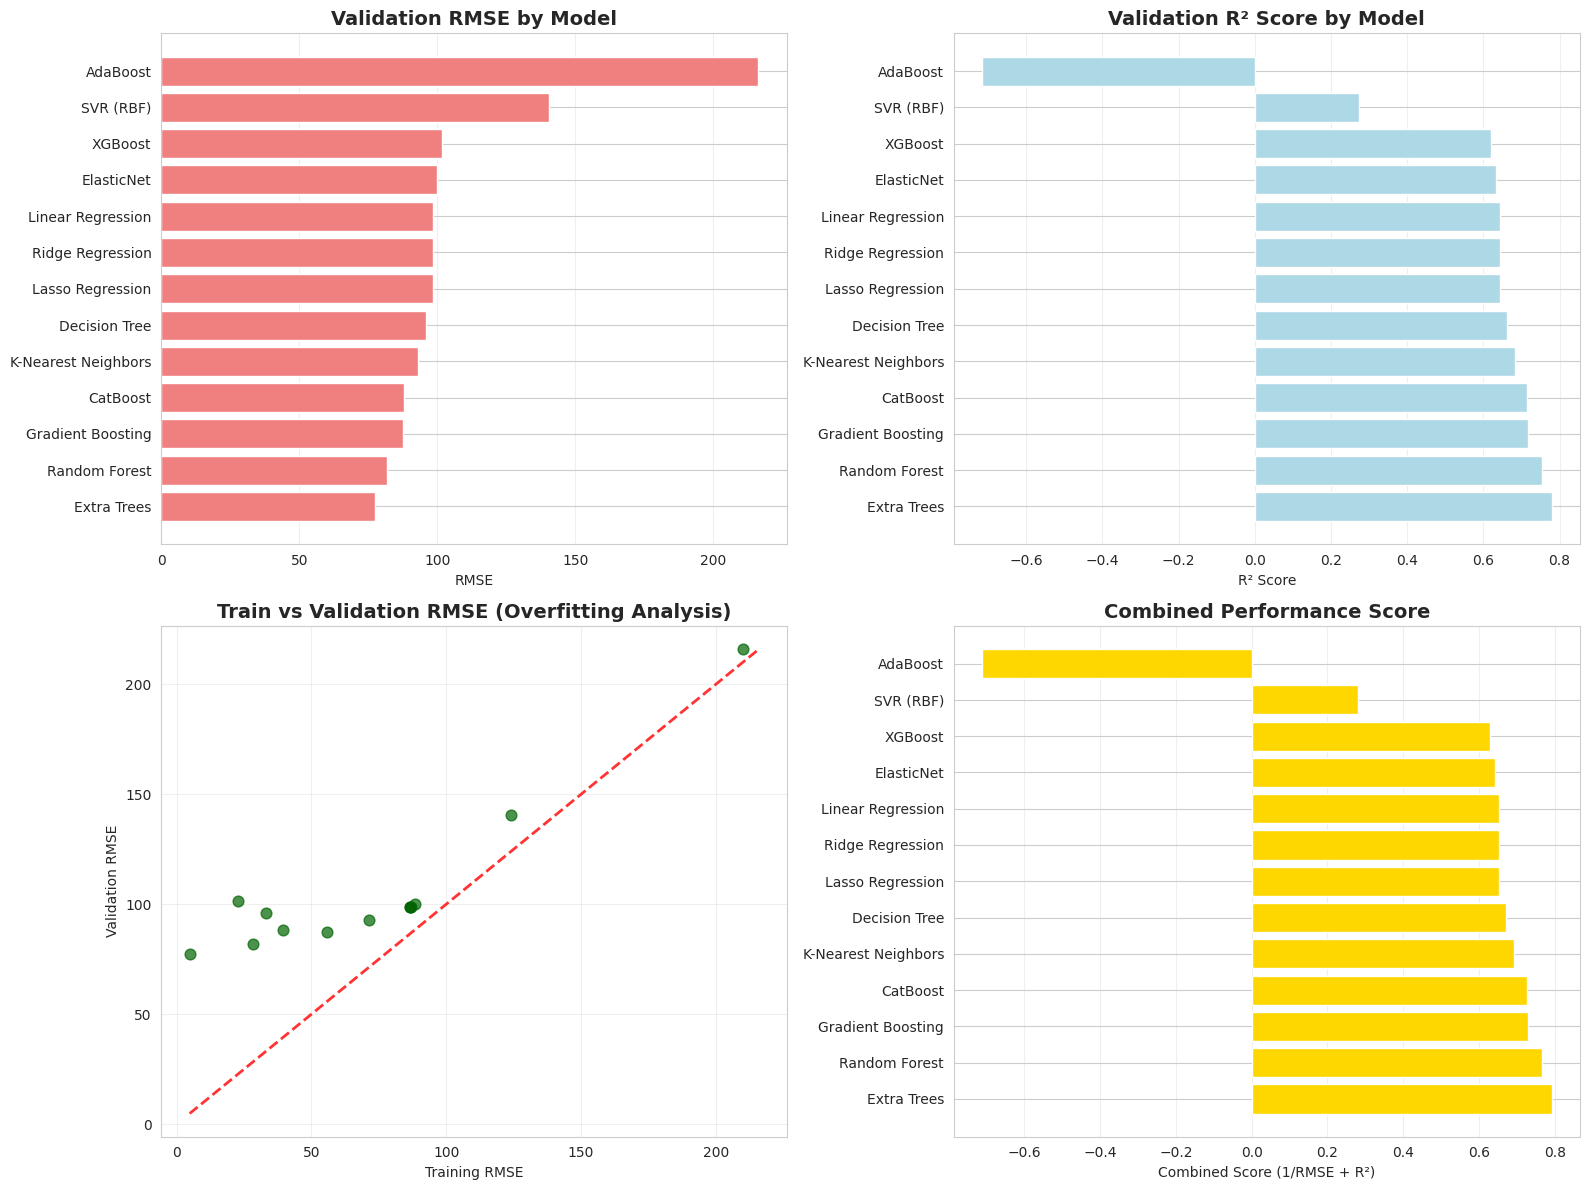

VISUALIZATION INSIGHTS

Key Insights from Performance Visualization:

1. RMSE Comparison: Lower values indicate better performance
2. R² Comparison: Higher values indicate better explained variance
3. Overfitting Analysis: Points far above diagonal line indicate overfitting
4. Combined Score: Balances both RMSE and R² for overall ranking

Models closest to the diagonal line in plot 3 have good generalization.
Models far above the line may be overfitting to training data.



In [25]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Validation RMSE comparison
axes[0, 0].barh(results_df['Model'], results_df['Val_RMSE'], color='lightcoral')
axes[0, 0].set_title('Validation RMSE by Model', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('RMSE')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Validation R² comparison
axes[0, 1].barh(results_df['Model'], results_df['Val_R2'], color='lightblue')
axes[0, 1].set_title('Validation R² Score by Model', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('R² Score')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Train vs Validation RMSE (Overfitting analysis)
axes[1, 0].scatter(results_df['Train_RMSE'], results_df['Val_RMSE'], 
                   c='darkgreen', s=60, alpha=0.7)
# Add diagonal line (perfect generalization)
min_rmse = min(results_df['Train_RMSE'].min(), results_df['Val_RMSE'].min())
max_rmse = max(results_df['Train_RMSE'].max(), results_df['Val_RMSE'].max())
axes[1, 0].plot([min_rmse, max_rmse], [min_rmse, max_rmse], 'r--', alpha=0.8, linewidth=2)
axes[1, 0].set_xlabel('Training RMSE')
axes[1, 0].set_ylabel('Validation RMSE')
axes[1, 0].set_title('Train vs Validation RMSE (Overfitting Analysis)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Model ranking by combined metrics
# Create a score combining RMSE (inverted) and R²
results_df['Combined_Score'] = (1 / results_df['Val_RMSE']) + results_df['Val_R2']
results_df_sorted = results_df.sort_values('Combined_Score', ascending=False)

axes[1, 1].barh(results_df_sorted['Model'], results_df_sorted['Combined_Score'], color='gold')
axes[1, 1].set_title('Combined Performance Score', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Combined Score (1/RMSE + R²)')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 80)
print("VISUALIZATION INSIGHTS")
print("=" * 80)
print("""
Key Insights from Performance Visualization:

1. RMSE Comparison: Lower values indicate better performance
2. R² Comparison: Higher values indicate better explained variance
3. Overfitting Analysis: Points far above diagonal line indicate overfitting
4. Combined Score: Balances both RMSE and R² for overall ranking

Models closest to the diagonal line in plot 3 have good generalization.
Models far above the line may be overfitting to training data.
""")

### Hyperparameter Tuning

Now let's tune the hyperparameters of the top 3 performing models to improve their performance further.

In [26]:
# Define hyperparameter grids for top models
print("=" * 80)
print("HYPERPARAMETER TUNING SETUP")
print("=" * 80)

# Parameter grids for different model types
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    } if XGBOOST_AVAILABLE else {},
    'Ridge Regression': {
        'alpha': [0.1, 1.0, 10.0, 100.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr']
    },
    'Lasso Regression': {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'max_iter': [1000, 2000, 3000]
    },
    'SVR (RBF)': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'epsilon': [0.01, 0.1, 0.2]
    },
    'Extra Trees': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }
}

print(f"Hyperparameter grids defined for {len(param_grids)} model types")
print(f"Top 3 models to tune: {top_3_models}")

# Check which of top 3 have parameter grids
tuneable_models = [model for model in top_3_models if model in param_grids]
print(f"Models that will be tuned: {tuneable_models}")

if len(tuneable_models) < 3:
    print(f"Note: Only {len(tuneable_models)} of top 3 models have parameter grids defined")
    print("Will tune available models and select additional models if needed")

HYPERPARAMETER TUNING SETUP
Hyperparameter grids defined for 7 model types
Top 3 models to tune: ['Extra Trees', 'Random Forest', 'Gradient Boosting']
Models that will be tuned: ['Extra Trees', 'Random Forest', 'Gradient Boosting']


In [27]:
# Perform hyperparameter tuning on top 3 models
print("=" * 80)
print("PERFORMING HYPERPARAMETER TUNING")
print("=" * 80)

tuned_results = []
best_models = {}

# Only tune the top 3 models that have parameter grids defined
models_to_tune = []
for model in top_3_models:
    if model in param_grids and model in trained_models:
        models_to_tune.append(model)
    if len(models_to_tune) == 1:
        break

# If we don't have 3 tuneable models from top 3, add more from results
if len(models_to_tune) < 3:
    for model in results_df['Model'].tolist()[3:]:
        if model in param_grids and model in trained_models and model not in models_to_tune:
            models_to_tune.append(model)
        if len(models_to_tune) == 3:
            break

print(f"Models selected for tuning: {models_to_tune}")

for i, model_name in enumerate(models_to_tune, 1):
    if model_name in param_grids and model_name in trained_models:
        print(f"\nTuning Model {i}/3: {model_name}")
        print("-" * 50)
        
        # Get the base model
        base_model = trained_models[model_name]
        
        # Create a fresh instance of the same model type
        model_class = type(base_model)
        try:
            fresh_model = model_class(**{k: v for k, v in base_model.get_params().items() if not k.startswith('_')})
        except:
            fresh_model = model_class()
        
        # Set up GridSearchCV
        grid_search = GridSearchCV(
            fresh_model,
            param_grids[model_name],
            cv=5,  # 5-fold cross-validation
            scoring='neg_root_mean_squared_error',  # Negative RMSE
            n_jobs=-1,  # Use all available cores
            verbose=1   # Show progress
        )
        
        # Fit the grid search
        print(f"  Searching through {np.prod([len(v) for v in param_grids[model_name].values()])} parameter combinations...")
        grid_search.fit(X_train, y_train)
        
        # Get the best model
        best_model = grid_search.best_estimator_
        
        # Evaluate the tuned model
        tuned_result = evaluate_model(best_model, X_train, X_val, y_train, y_val, f"{model_name}_Tuned")
        tuned_results.append(tuned_result)
        best_models[model_name] = best_model
        
        # Compare with original
        original_result = results_df[results_df['Model'] == model_name]
        if not original_result.empty:
            original_rmse = original_result['Val_RMSE'].iloc[0]
            improvement = original_rmse - tuned_result['Val_RMSE']
            improvement_pct = (improvement / original_rmse) * 100
            
            print(f"  Best Parameters: {grid_search.best_params_}")
            print(f"  Original RMSE: {original_rmse:.4f}")
            print(f"  Tuned RMSE: {tuned_result['Val_RMSE']:.4f}")
            print(f"  Improvement: {improvement:.4f} ({improvement_pct:.2f}%)")
        
    else:
        print(f"  Warning: Skipping {model_name} - No parameter grid available")

print(f"\nHyperparameter tuning completed for {len(tuned_results)} models")

PERFORMING HYPERPARAMETER TUNING
Models selected for tuning: ['Extra Trees', 'Lasso Regression', 'Ridge Regression']

Tuning Model 1/3: Extra Trees
--------------------------------------------------
  Searching through 48 parameter combinations...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Training Extra Trees_Tuned...
  Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
  Original RMSE: 77.5439
  Tuned RMSE: 84.6793
  Improvement: -7.1355 (-9.20%)

Tuning Model 2/3: Lasso Regression
--------------------------------------------------
  Searching through 15 parameter combinations...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Training Lasso Regression_Tuned...
  Best Parameters: {'alpha': 0.1, 'max_iter': 1000}
  Original RMSE: 98.5006
  Tuned RMSE: 98.4847
  Improvement: 0.0160 (0.02%)

Tuning Model 3/3: Ridge Regression
--------------------------------------------------
  Se

ORIGINAL vs TUNED MODEL COMPARISON
              Model  Original_RMSE  Tuned_RMSE  Original_R2  Tuned_R2  \
0       Extra Trees        77.5439     84.6793       0.7789    0.7363   
1  Lasso Regression        98.5006     98.4847       0.6432    0.6433   
2  Ridge Regression        98.5219     98.5128       0.6430    0.6431   

   RMSE_Improvement  R2_Improvement  
0           -7.1355         -0.0426  
1            0.0160          0.0001  
2            0.0091          0.0001  


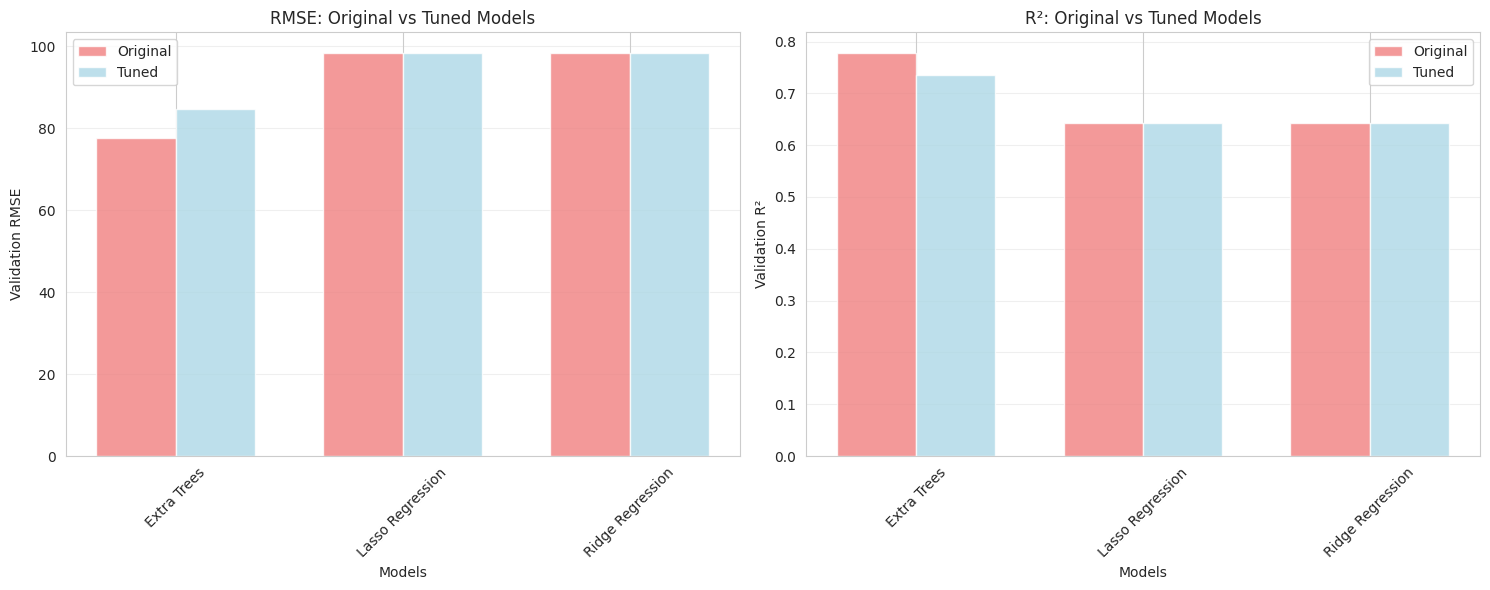


TUNING SUMMARY:
  • Average RMSE improvement: -2.3701
  • Average R² improvement: -0.0141
  • Models improved: 2/3

Model comparison completed


In [28]:
# Compare original vs tuned models
print("=" * 80)
print("ORIGINAL vs TUNED MODEL COMPARISON")
print("=" * 80)

if tuned_results:
    # Create comparison DataFrame
    comparison_data = []
    
    for tuned_result in tuned_results:
        original_name = tuned_result['Model'].replace('_Tuned', '')
        original_result = results_df[results_df['Model'] == original_name]
        
        if not original_result.empty:
            comparison_data.append({
                'Model': original_name,
                'Original_RMSE': original_result['Val_RMSE'].iloc[0],
                'Tuned_RMSE': tuned_result['Val_RMSE'],
                'Original_R2': original_result['Val_R2'].iloc[0],
                'Tuned_R2': tuned_result['Val_R2'],
                'RMSE_Improvement': original_result['Val_RMSE'].iloc[0] - tuned_result['Val_RMSE'],
                'R2_Improvement': tuned_result['Val_R2'] - original_result['Val_R2'].iloc[0]
            })
    
    if comparison_data:
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.round(4))
        
        # Visualization of improvements
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # RMSE comparison
        x = range(len(comparison_df))
        width = 0.35
        
        axes[0].bar([i - width/2 for i in x], comparison_df['Original_RMSE'], 
                   width, label='Original', alpha=0.8, color='lightcoral')
        axes[0].bar([i + width/2 for i in x], comparison_df['Tuned_RMSE'], 
                   width, label='Tuned', alpha=0.8, color='lightblue')
        
        axes[0].set_xlabel('Models')
        axes[0].set_ylabel('Validation RMSE')
        axes[0].set_title('RMSE: Original vs Tuned Models')
        axes[0].set_xticks(x)
        axes[0].set_xticklabels(comparison_df['Model'], rotation=45)
        axes[0].legend()
        axes[0].grid(axis='y', alpha=0.3)
        
        # R² comparison
        axes[1].bar([i - width/2 for i in x], comparison_df['Original_R2'], 
                   width, label='Original', alpha=0.8, color='lightcoral')
        axes[1].bar([i + width/2 for i in x], comparison_df['Tuned_R2'], 
                   width, label='Tuned', alpha=0.8, color='lightblue')
        
        axes[1].set_xlabel('Models')
        axes[1].set_ylabel('Validation R²')
        axes[1].set_title('R²: Original vs Tuned Models')
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(comparison_df['Model'], rotation=45)
        axes[1].legend()
        axes[1].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Summary of improvements
        print(f"\nTUNING SUMMARY:")
        avg_rmse_improvement = comparison_df['RMSE_Improvement'].mean()
        avg_r2_improvement = comparison_df['R2_Improvement'].mean()
        
        print(f"  • Average RMSE improvement: {avg_rmse_improvement:.4f}")
        print(f"  • Average R² improvement: {avg_r2_improvement:.4f}")
        print(f"  • Models improved: {(comparison_df['RMSE_Improvement'] > 0).sum()}/{len(comparison_df)}")

else:
    print("No tuned models to compare.")
    
print("\nModel comparison completed")

### Final Model Selection & Predictions

Based on our comprehensive analysis, let's select the best performing model and generate final predictions.

In [29]:
# Select the best overall model
print("=" * 80)
print("FINAL MODEL SELECTION")
print("=" * 80)

# Combine original and tuned results
all_results = results_df.copy()
if tuned_results:
    tuned_df = pd.DataFrame(tuned_results)
    all_results = pd.concat([all_results, tuned_df], ignore_index=True)

# Sort by validation RMSE to find the best model
all_results = all_results.sort_values('Val_RMSE')
best_model_info = all_results.iloc[0]

print(f"BEST PERFORMING MODEL: {best_model_info['Model']}")
print(f"Performance Metrics:")
print(f"  • Validation RMSE: {best_model_info['Val_RMSE']:.4f}")
print(f"  • Validation R²: {best_model_info['Val_R2']:.4f}")
print(f"  • Validation MAE: {best_model_info['Val_MAE']:.4f}")
print(f"  • Overfitting Score: {best_model_info['Overfitting']:.4f}")

# Get the actual model object
best_model_name = best_model_info['Model']
if '_Tuned' in best_model_name:
    original_name = best_model_name.replace('_Tuned', '')
    final_model = best_models[original_name]
    print(f"  • Model Type: Hyperparameter-tuned {original_name}")
else:
    final_model = trained_models[best_model_name]
    print(f"  • Model Type: Original {best_model_name}")

print(f"\nModel Performance Ranking (Top 5):")
for i, (_, row) in enumerate(all_results.head().iterrows(), 1):
    print(f"  {i}. {row['Model']}: RMSE = {row['Val_RMSE']:.4f}, R² = {row['Val_R2']:.4f}")

print("\nFinal model selected successfully")

FINAL MODEL SELECTION
BEST PERFORMING MODEL: Extra Trees
Performance Metrics:
  • Validation RMSE: 77.5439
  • Validation R²: 0.7789
  • Validation MAE: 28.3187
  • Overfitting Score: -72.7168
  • Model Type: Original Extra Trees

Model Performance Ranking (Top 5):
  1. Extra Trees: RMSE = 77.5439, R² = 0.7789
  2. Random Forest: RMSE = 81.6705, R² = 0.7547
  3. Extra Trees_Tuned: RMSE = 84.6793, R² = 0.7363
  4. Gradient Boosting: RMSE = 87.5221, R² = 0.7183
  5. CatBoost: RMSE = 88.0842, R² = 0.7147

Final model selected successfully


GENERATING FINAL PREDICTIONS
Generated predictions for 3320 test samples

Prediction Statistics:
  • Mean predicted price: 107.83 lakhs
  • Median predicted price: 71.49 lakhs
  • Min predicted price: 14.00 lakhs
  • Max predicted price: 2245.32 lakhs
  • Std deviation: 114.89 lakhs

Submission file saved: 'submission.csv'

Sample Predictions:
   id       price
0   0   71.890000
1   1  114.550000
2   2   70.594000
3   3  128.940000
4   4  144.692900
5   5   64.572000
6   6   59.024933
7   7   37.755000
8   8  109.926500
9   9   49.271900

Prediction vs Training Data Comparison:
  Training - Mean: 114.73, Std: 152.89
  Predictions - Mean: 107.83, Std: 114.89


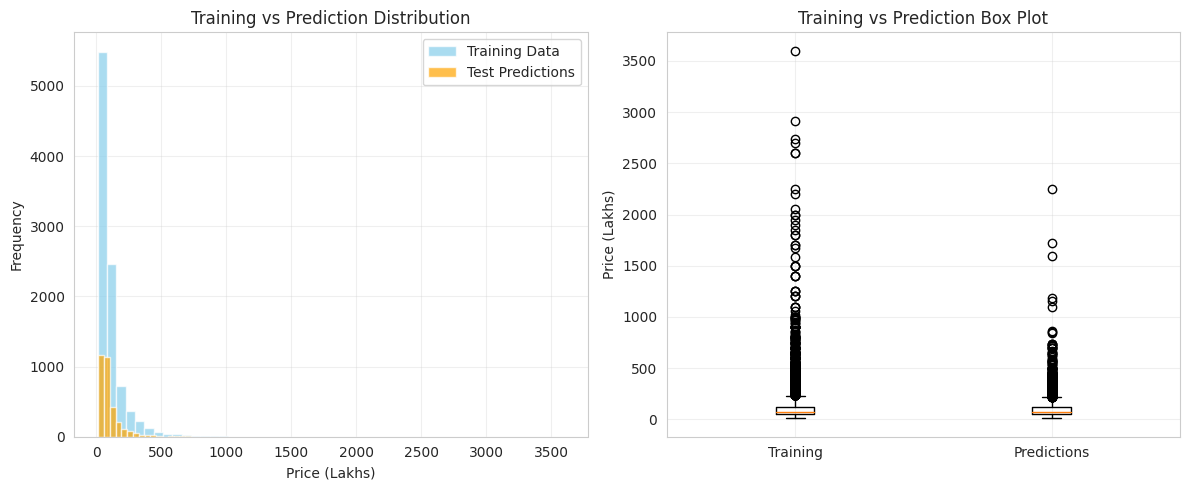

Final predictions completed and saved!


In [30]:
# Generate final predictions
print("=" * 80)
print("GENERATING FINAL PREDICTIONS")
print("=" * 80)

# Make predictions on test set
test_predictions = final_model.predict(X_test_final)

print(f"Generated predictions for {len(test_predictions)} test samples")
print(f"\nPrediction Statistics:")
print(f"  • Mean predicted price: {test_predictions.mean():.2f} lakhs")
print(f"  • Median predicted price: {np.median(test_predictions):.2f} lakhs")
print(f"  • Min predicted price: {test_predictions.min():.2f} lakhs")
print(f"  • Max predicted price: {test_predictions.max():.2f} lakhs")
print(f"  • Std deviation: {test_predictions.std():.2f} lakhs")

# Create submission file
submission_df = pd.DataFrame({
    'id': range(len(test_predictions)),
    'price': test_predictions
})

# Save to CSV
submission_df.to_csv('submission.csv', index=False)
print(f"\nSubmission file saved: 'submission.csv'")

# Display first few predictions
print(f"\nSample Predictions:")
print(submission_df.head(10))

# Compare with training data distribution
print(f"\nPrediction vs Training Data Comparison:")
print(f"  Training - Mean: {y.mean():.2f}, Std: {y.std():.2f}")
print(f"  Predictions - Mean: {test_predictions.mean():.2f}, Std: {test_predictions.std():.2f}")

# Visualize prediction distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50, alpha=0.7, label='Training Data', color='skyblue')
plt.hist(test_predictions, bins=50, alpha=0.7, label='Test Predictions', color='orange')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency')
plt.title('Training vs Prediction Distribution')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([y, test_predictions], labels=['Training', 'Predictions'])
plt.ylabel('Price (Lakhs)')
plt.title('Training vs Prediction Box Plot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Final predictions completed and saved!")